In [97]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

<h3>Preprocessing</h3>

In [42]:
##Source : https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats
df_raw = pd.read_csv(r'data/2022-2023 Football Player Stats.csv',engine='python',encoding='latin1', sep=';')
df = df_raw.copy()

In [43]:
df = df.drop_duplicates(subset=['Player', 'Nation'], keep='first')

In [44]:
##Source : https://datahub.io/core/country-codes
df_nation_code_raw = pd.read_csv(r'data/country-codes_csv.csv')
df_nation_code = df_nation_code_raw.copy()

In [45]:
df.sample(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1004,1005,Adrian Grbi?,AUT,MFFW,Lorient,Ligue 1,26,1996,2,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,6.67,0.0
2610,2611,Joe Willock,ENG,MF,Newcastle Utd,Premier League,23,1999,22,20,...,0.17,1.85,1.18,0.0,0.0,0.0,4.83,0.62,0.67,47.8
1982,1983,Gonzalo Plata,ECU,FWMF,Valladolid,La Liga,22,2000,16,9,...,0.10,1.37,1.67,0.1,0.0,0.0,5.00,0.39,2.16,15.4
1701,1702,Gonzalo Montiel,ARG,DF,Sevilla,La Liga,26,1997,13,9,...,0.79,3.15,0.56,0.0,0.0,0.0,5.17,1.12,1.12,50.0
249,250,Fran Beltrán,ESP,MF,Celta Vigo,La Liga,24,1999,20,18,...,0.11,1.17,0.61,0.0,0.0,0.0,6.42,0.61,1.45,29.7


In [46]:
df_nation_code.sample(5)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
229,TCA,1-649,TCA,tc,Territory of GB,796.0,251,TK,TI,TC,...,Latin America and the Caribbean,Острова Тёркс и Кайкос,World,Cockburn Town,NaN,.tc,en-TC,3576916.0,Turks & Caicos Islands,W7
173,PCN,870,PCN,pc,Territory of GB,612.0,197,PC,PT,PN,...,Polynesia,Питкэрн,World,Adamstown,OC,.pn,en-PN,4030699.0,Pitcairn Islands,R8
158,NCA,505,NIC,nq,Yes,558.0,180,NU,NK,NI,...,Latin America and the Caribbean,Никарагуа,World,Managua,NaN,.ni,"es-NI,en",3617476.0,Nicaragua,Q3
203,SVN,386,SVN,xv,Yes,705.0,224,SI,LJ,SI,...,Southern Europe,Словения,World,Ljubljana,EU,.si,"sl,sh",3190538.0,Slovenia,2A
171,PER,51,PER,pe,Yes,604.0,195,PE,PR,PE,...,Latin America and the Caribbean,Перу,World,Lima,SA,.pe,"es-PE,qu,ay",3932488.0,Peru,R5


In [47]:
## merge with continent and nstion name
df_merged = pd.merge(df, df_nation_code[['FIFA', 'official_name_es', 'Region Name']], how='left', left_on = 'Nation', right_on = 'FIFA')

In [48]:
set(df_merged.columns)

{'2CrdY',
 '90s',
 'AerLost',
 'AerWon',
 'AerWon%',
 'Age',
 'Assists',
 'BlkPass',
 'BlkSh',
 'Blocks',
 'Born',
 'CK',
 'CPA',
 'Car3rd',
 'CarDis',
 'CarMis',
 'CarPrgDist',
 'CarProg',
 'CarTotDist',
 'Carries',
 'CkIn',
 'CkOut',
 'CkStr',
 'Clr',
 'Comp',
 'CrdR',
 'CrdY',
 'Crs',
 'CrsPA',
 'Err',
 'FIFA',
 'Fld',
 'Fls',
 'G/Sh',
 'G/SoT',
 'GCA',
 'GcaDef',
 'GcaDrib',
 'GcaFld',
 'GcaPassDead',
 'GcaPassLive',
 'GcaSh',
 'Goals',
 'Int',
 'MP',
 'Min',
 'Nation',
 'OG',
 'Off',
 'PKatt',
 'PKcon',
 'PKwon',
 'PPA',
 'Pas3rd',
 'PasAss',
 'PasAtt',
 'PasBlocks',
 'PasCmp',
 'PasCrs',
 'PasDead',
 'PasFK',
 'PasLive',
 'PasLonAtt',
 'PasLonCmp',
 'PasLonCmp%',
 'PasMedAtt',
 'PasMedCmp',
 'PasMedCmp%',
 'PasOff',
 'PasProg',
 'PasShoAtt',
 'PasShoCmp',
 'PasShoCmp%',
 'PasTotAtt',
 'PasTotCmp',
 'PasTotCmp%',
 'PasTotDist',
 'PasTotPrgDist',
 'Player',
 'Pos',
 'Rec',
 'RecProg',
 'Recov',
 'Region Name',
 'Rk',
 'SCA',
 'ScaDef',
 'ScaDrib',
 'ScaFld',
 'ScaPassDead',
 'ScaPa

In [49]:
df_merged.sample(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,FIFA,official_name_es,Region Name
72,76,Éder Álvarez Balanta,COL,MF,Schalke 04,Bundesliga,29,1993,1,1,...,0.0,0.00,0.00,5.00,0.00,0.00,0.0,COL,Colombia,Americas
985,1042,Péter Gulácsi,HUN,GK,RB Leipzig,Bundesliga,32,1990,6,6,...,0.0,0.00,0.00,2.00,0.00,0.00,0.0,HUN,Hungría,Europe
172,182,Leonardo Balerdi,ARG,DF,Marseille,Ligue 1,24,1999,23,20,...,0.0,0.05,0.05,6.38,1.79,1.73,50.7,ARG,Argentina,Americas
1368,1441,Marcin Listkowski,POL,MFFW,Lecce,Serie A,25,1998,5,0,...,0.0,0.00,0.00,5.56,1.11,0.00,100.0,POL,Polonia,Europe
1182,1248,Arnaud Kalimuendo,FRA,FW,Rennes,Ligue 1,21,2002,15,12,...,0.0,0.00,0.00,2.78,0.83,3.52,19.1,FRA,Francia,Europe


In [133]:
df_merged.to_csv(r'data/data_for_streamlit.csv', sep=';', index=None)

In [50]:
df_merged[df_merged['Nation']=='POR']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,FIFA,official_name_es,Region Name
68,72,Domingos André Ribeiro Almeida,POR,MF,Valencia,La Liga,22,2000,18,14,...,0.0,0.00,0.00,5.68,0.65,1.15,36.0,POR,Portugal,Europe
200,211,Gil Bastião Dias,POR,FW,Stuttgart,Bundesliga,26,1996,2,1,...,0.0,0.00,0.00,7.69,0.00,0.77,0.0,POR,Portugal,Europe
363,380,Aurélio Buta,POR,DF,Eint Frankfurt,Bundesliga,26,1997,4,2,...,0.0,0.00,0.00,5.60,0.80,2.40,25.0,POR,Portugal,Europe
372,389,Cafú,POR,MF,Nott'ham Forest,Premier League,29,1993,1,0,...,0.0,0.00,0.00,10.00,0.00,0.00,0.0,POR,Portugal,Europe
401,419,João Cancelo,POR,DF,Manchester City,Premier League,28,1994,17,16,...,0.0,0.14,0.00,5.63,1.90,0.77,71.1,POR,Portugal,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,2528,Miguel Veloso,POR,MF,Hellas Verona,Serie A,36,1986,15,10,...,0.0,0.00,0.11,9.04,0.74,1.06,41.2,POR,Portugal,Europe
2416,2546,Fabio Vieira,POR,MFFW,Arsenal,Premier League,22,2000,12,1,...,0.0,0.00,0.00,6.33,0.33,0.33,50.0,POR,Portugal,Europe
2426,2561,Rúben Vinagre,POR,DFMF,Everton,Premier League,23,1999,2,0,...,0.0,0.00,0.00,13.30,0.00,3.33,0.0,POR,Portugal,Europe
2430,2565,Vitinha,POR,FW,Marseille,Ligue 1,22,2000,2,1,...,0.0,0.00,0.00,5.00,0.00,1.67,0.0,POR,Portugal,Europe


In [51]:
df_merged['Region Name'].unique()

array(['Americas', 'Africa', 'Europe', nan, 'Asia', 'Oceania'],
      dtype=object)

In [52]:
df_merged.shape

(2546, 127)

In [53]:
df_merged[df_merged['Region Name']=='Asia'].shape

(53, 127)

<h3>Exploratory</h3>

In [54]:
df_asia = df_merged[df_merged['Region Name']=='Asia'].copy()

In [55]:
fig = px.treemap(df_asia, path =['Player'], values = 'Goals', width = 1200, height = 400, title = '\nTotal Goals Scored By Player')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

C:\Users\Muarrikh Yazka\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [130]:
fig = px.bar(df_asia.sort_values(by = 'Goals', ascending = False), x="Player", y="Goals", barmode="group")
fig.show()

Text(0.5, 1.0, '\nAverage playing time per player\n')

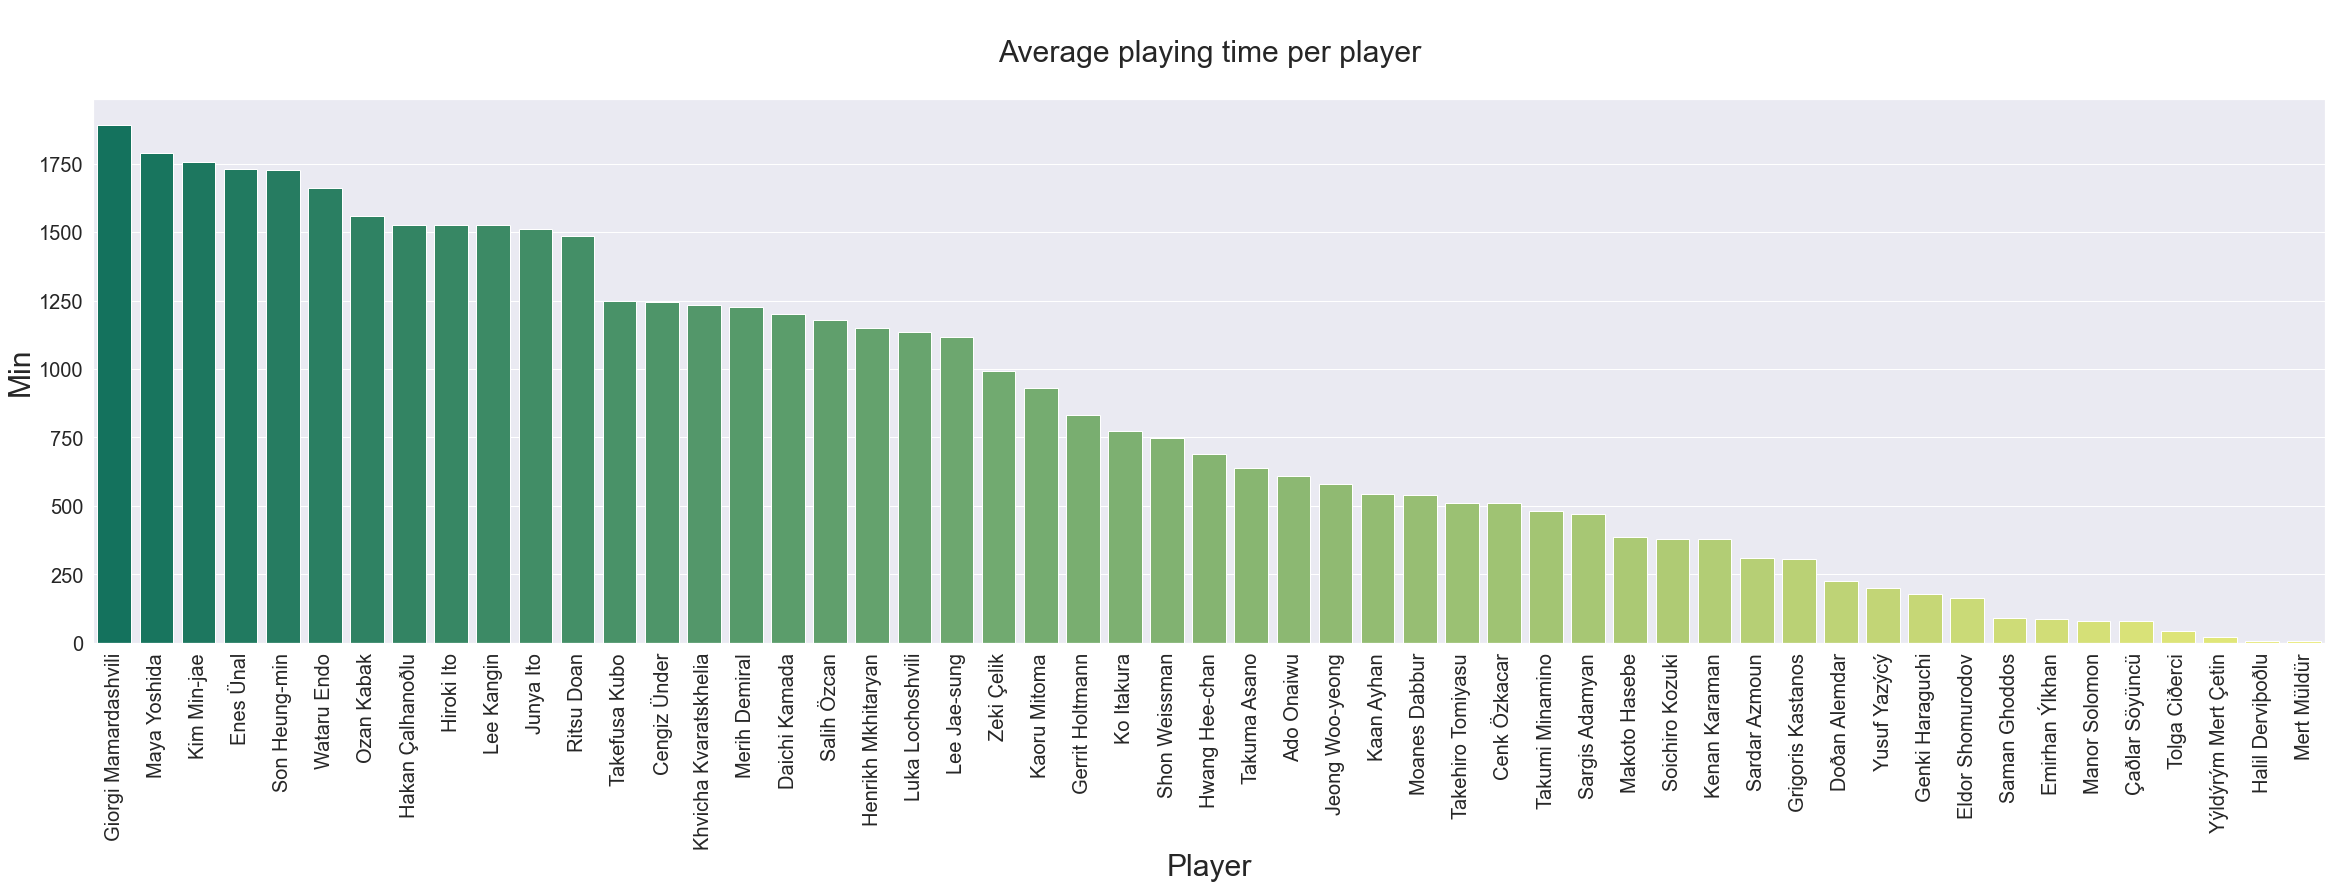

In [56]:
tks = df_asia.groupby('Player', as_index=False)['Min'].mean().sort_values(by = 'Min', ascending = False)
sns.set(rc = {'figure.figsize': (40, 10)})
plt.xticks(fontsize = 20, rotation = 'vertical')
plt.yticks(fontsize = 20)
plt.xlabel(None, fontsize = 30)
plt.ylabel(None, fontsize = 30)
p = sns.barplot(x='Player', y='Min', data = tks, palette = 'summer', capsize = .2)
p.axes.set_title('\nAverage playing time per player\n', fontsize = 30)

In [128]:
fig = px.bar(tks.sort_values(by = 'Min', ascending = False), x="Player", y="Min", barmode="group")
fig.show()

In [57]:
df_asia[['Player', 'Min']].head()

,Player,Min
15,Sargis Adamyan,471
58,Doðan Alemdar,225
123,Takuma Asano,637
145,Kaan Ayhan,545
148,Sardar Azmoun,311


Text(0.5, 1.0, '\nAverage playing time per player\n')

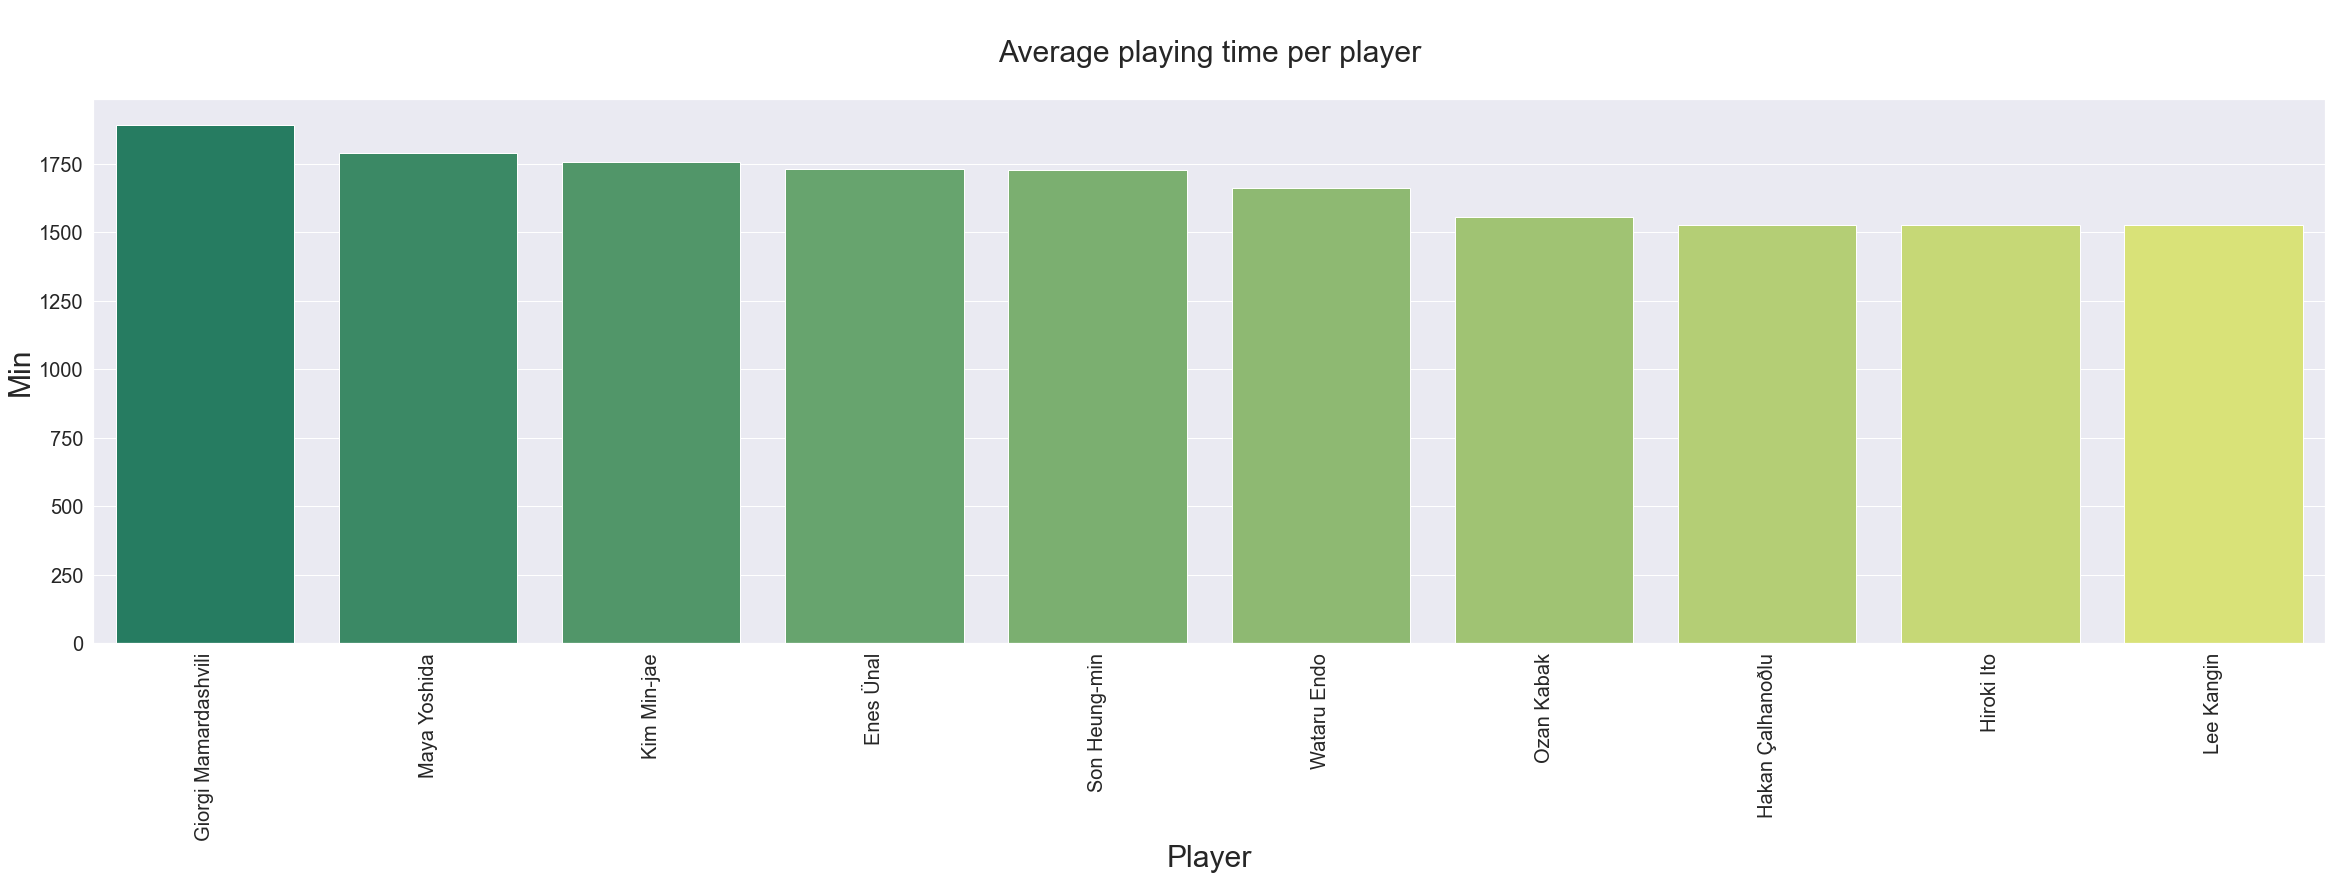

In [58]:
plt.xticks(fontsize = 20, rotation = 'vertical')
plt.yticks(fontsize = 20)
plt.xlabel(None, fontsize = 30)
plt.ylabel(None, fontsize = 30)
p = sns.barplot(x='Player', y='Min', data = tks.nlargest(10, 'Min'), palette = 'summer', capsize = .2)
p.axes.set_title('\nAverage playing time per player\n', fontsize = 30)

In [127]:
fig = px.bar(tks.nlargest(10, 'Min').sort_values(by = 'Min', ascending = False), x="Player", y="Min", barmode="group")
fig.show()

Text(0.5, 1.0, '\nAge of Asian player\n')

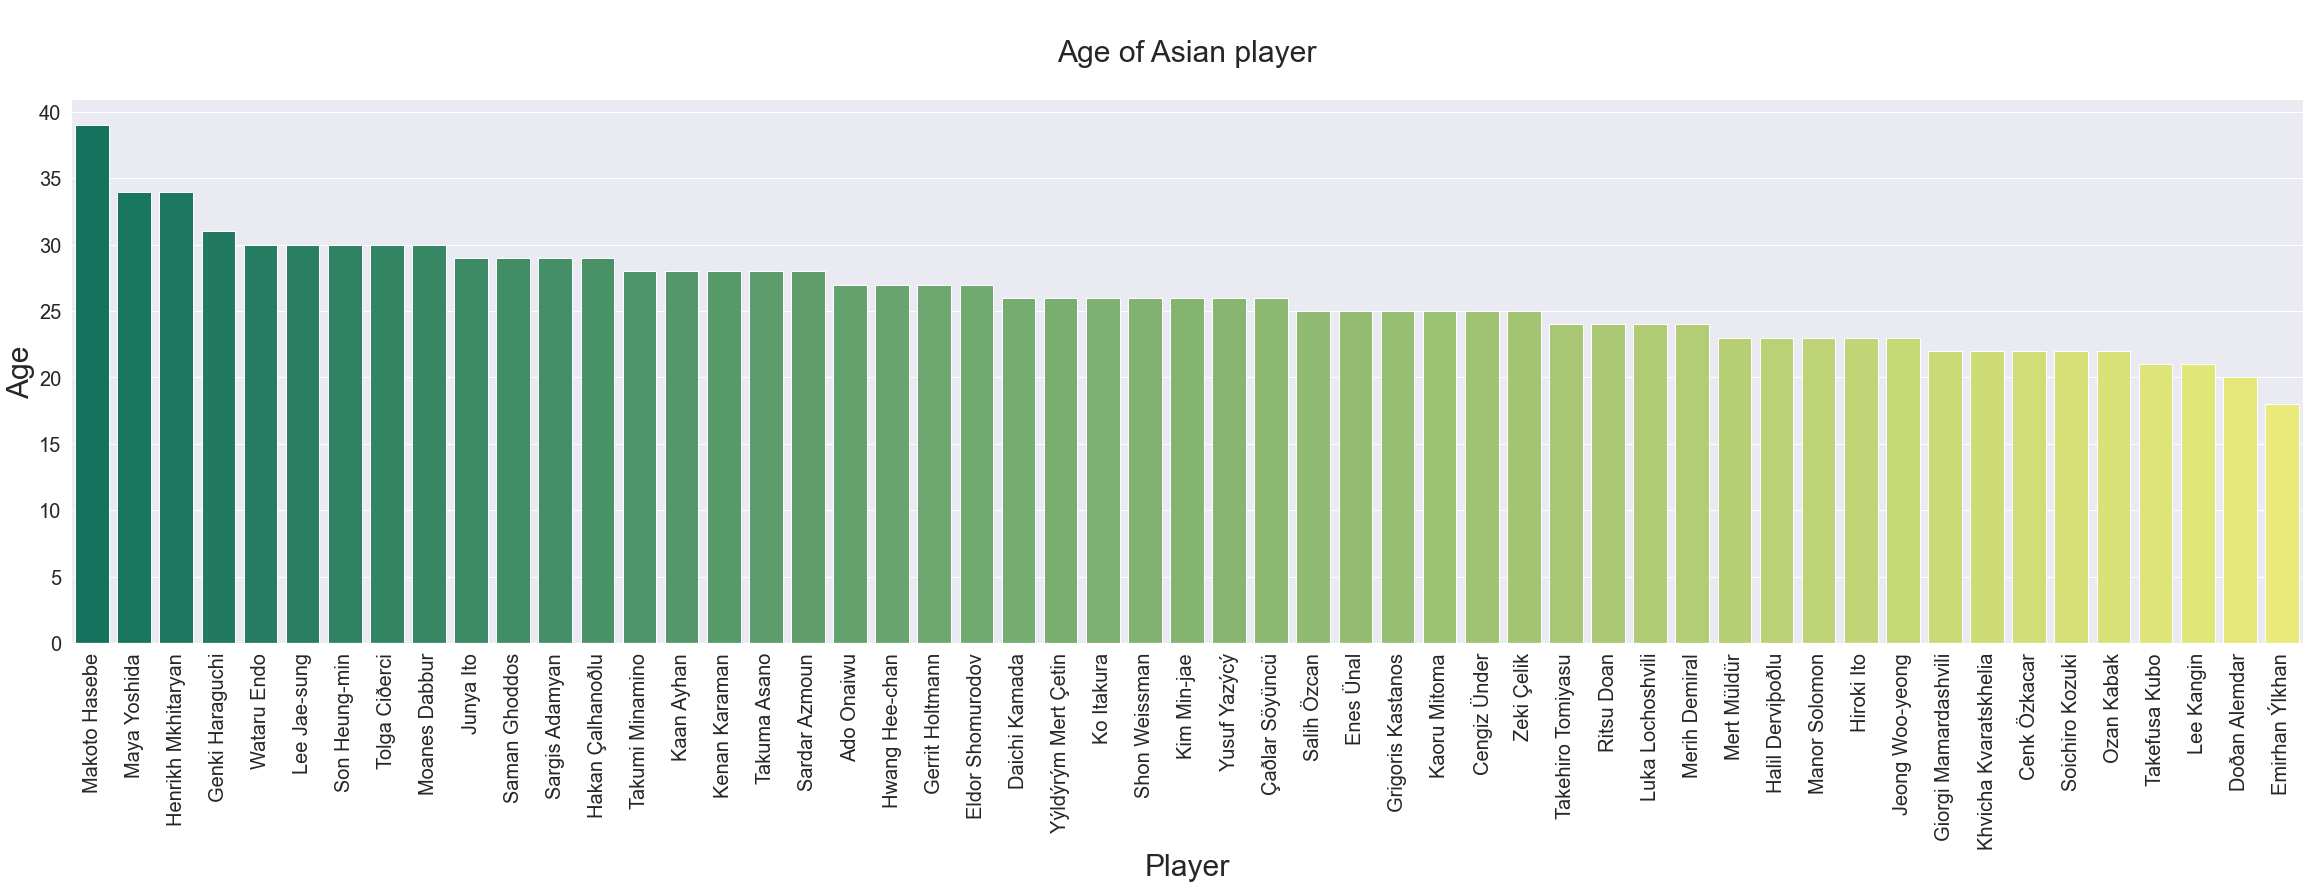

In [59]:
sns.set(rc = {'figure.figsize': (40, 10)})
plt.xticks(fontsize = 20, rotation = 'vertical')
plt.yticks(fontsize = 20)
plt.xlabel(None, fontsize = 30)
plt.ylabel(None, fontsize = 30)
p = sns.barplot(x='Player', y='Age', data = df_asia.sort_values(by = 'Age', ascending = False), palette = 'summer', capsize = .2)
p.axes.set_title('\nAge of Asian player\n', fontsize = 30)

In [60]:
fig = px.bar(df_asia.sort_values(by = 'Age', ascending = False), x="Player", y="Age", barmode="group")
fig.show()

In [61]:
df_asia.sort_values(by = 'Age', ascending = False)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,FIFA,official_name_es,Region Name
1023,1081,Makoto Hasebe,JPN,DF,Eint Frankfurt,Bundesliga,39,1984,6,4,...,0.00,0.00,0.00,5.35,1.86,1.16,61.5,JPN,Japón,Asia
2501,2640,Maya Yoshida,JPN,DF,Schalke 04,Bundesliga,34,1988,20,20,...,0.00,0.00,0.00,5.68,2.71,1.26,68.4,JPN,Japón,Asia
1600,1684,Henrikh Mkhitaryan,ARM,MF,Inter,Serie A,34,1989,18,13,...,0.00,0.00,0.00,7.27,0.23,0.63,27.3,ARM,Armenia,Asia
1018,1075,Genki Haraguchi,JPN,MF,Stuttgart,Bundesliga,31,1991,2,2,...,0.00,0.00,0.00,5.50,1.00,0.00,100.0,JPN,Japón,Asia
751,792,Wataru Endo,JPN,MF,Stuttgart,Bundesliga,30,1993,19,19,...,0.00,0.00,0.00,7.14,2.27,1.51,60.0,JPN,Japón,Asia
1121,1182,Lee Jae-sung,KOR,MF,Mainz 05,Bundesliga,30,1992,20,14,...,0.00,0.00,0.00,6.05,2.02,2.02,50.0,KOR,República de Corea,Asia
1056,1114,Son Heung-min,KOR,MFFW,Tottenham,Premier League,30,1992,21,20,...,0.00,0.00,0.00,3.33,0.31,0.63,33.3,KOR,República de Corea,Asia
480,504,Tolga Ciðerci,TUR,MF,Hertha BSC,Bundesliga,30,1992,1,0,...,0.00,0.00,0.00,22.00,2.00,2.00,50.0,TUR,Turquía,Asia
557,583,Moanes Dabbur,ISR,FW,Hoffenheim,Bundesliga,30,1992,13,4,...,0.00,0.00,0.00,3.83,0.33,2.00,14.3,ISR,Israel,Asia
1116,1177,Junya Ito,JPN,FW,Reims,Ligue 1,29,1993,19,18,...,0.00,0.00,0.00,4.29,0.42,0.65,38.9,JPN,Japón,Asia


In [62]:
pos = df_asia.groupby('Pos', as_index=False)['Player'].count().sort_values(by = 'Player', ascending = False)
fig = px.pie(pos, values='Player', names='Pos', title = 'Position')
fig.show()

In [63]:
pos

,Pos,Player
0,DF,15
1,FW,11
5,MF,10
7,MFFW,7
3,FWMF,5
4,GK,2
6,MFDF,2
2,FWDF,1


In [132]:
nation = df_asia.groupby('official_name_es', as_index=False)['Player'].count().sort_values(by = 'Player', ascending = False)
fig = px.bar(nation, y='Player', x='official_name_es', title = 'Nationality')
fig.show()

<h3>Forward</h3

In [117]:
df_forward = df_asia[df_asia['Pos'].str.contains('FW')].copy()
df_all_forward = df_merged[df_merged['Pos'].str.contains('FW')].copy()

In [118]:
forward_metrics = ['Goals', 'SoT%', 'Assists', 'AerWon%']
df_group_forward = df_all_forward.groupby('Region Name', as_index=False)[forward_metrics].mean()
for metrics in forward_metrics:
    df_group_forward[metrics] = round(df_group_forward[metrics], 2)
    fig = px.bar(df_group_forward.sort_values(by = metrics, ascending = False), 
                 x="Region Name", 
                 y=metrics, 
                 barmode="group", 
                 title = metrics, 
                 width=800, 
                 height=600,
                 text= metrics)
    fig.update_traces(textposition="outside")
    fig.show()

<h3>Midfielder</h3>

In [119]:
df_asia_midfielder = df_asia[df_asia['Pos'].str.contains('MF')].copy()
df_all_midfielder = df_merged[df_merged['Pos'].str.contains('MF')].copy()

In [120]:
midfielder_metrics = ['PasTotCmp%', 'Assists', 'ScaDrib']
df_group_midfielder = df_all_midfielder.groupby('Region Name', as_index=False)[midfielder_metrics].mean()
for metrics in midfielder_metrics:
    df_group_midfielder[metrics] = round(df_group_midfielder[metrics], 2)
    fig = px.bar(df_group_midfielder.sort_values(by = metrics, ascending = False),
                 x="Region Name", 
                 y=metrics, 
                 barmode="group", 
                 title = metrics, 
                 width=800, 
                 height=600,
                 text= metrics)
    fig.update_traces(textposition="outside")
    fig.show()

<h3>Defender</h3>

In [121]:
df_asia_defender = df_asia[df_asia['Pos'].str.contains('DF')].copy()
df_all_defender = df_merged[df_merged['Pos'].str.contains('DF')].copy()

In [122]:
defender_metrics = ['Blocks', 'TklDri', 'Int', 'Clr', 'AerWon%']
df_group_defender = df_all_defender.groupby('Region Name', as_index=False)[defender_metrics].mean()
for metrics in defender_metrics:
    df_group_defender[metrics] = round(df_group_defender[metrics], 2)
    fig = px.bar(df_group_defender.sort_values(by = metrics, ascending = False), 
                 x="Region Name", 
                 y=metrics, 
                 barmode="group", 
                 title = metrics, 
                 width=800, 
                 height=600,
                 text= metrics)
    fig.update_traces(textposition="outside")
    fig.show()

<h3>Goalkeeper</h3>

In [124]:
df_asia_goalkeeper = df_asia[df_asia['Pos'].str.contains('GK')].copy()
df_all_goalkeeper = df_merged[df_merged['Pos'].str.contains('GK')].copy()